<a href="https://colab.research.google.com/github/kingajutrzenka/case-study/blob/main/predict_students_dropout_and_academic_success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Predict students' dropout and academic success*

# *Import*

In [7]:
!pip install -q kaggle

In [8]:
from google.colab import files
files.upload()  # wybierz kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle4.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle4.json

Saving kaggle4.json to kaggle4.json


In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/higher-education-predictors-of-student-retention")

print("Path to dataset files:", path)

100%|██████████| 87.2k/87.2k [00:00<00:00, 35.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/thedevastator/higher-education-predictors-of-student-retention/versions/2


In [10]:
import os
print(os.listdir(path))

['dataset.csv']


In [11]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "dataset.csv"))
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [13]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def set_forest_spring_theme():
    """Presentation style – Forest Spring Palette"""
    palette = ["#59798F",  # Glaucous
               "#A9BCC4",  # Powder Blue
               "#EEC69D",  # Vanilla
               "#749445",  # Moss Green
               "#243C2C"]  # Dark Green

    sns.set_theme(
        style="whitegrid",
        rc={
            "axes.spines.top": False,
            "axes.spines.right": False,
            "axes.titlesize": 14,
            "axes.labelsize": 12,
            "grid.alpha": 0.2,
            "figure.dpi": 120,
            "savefig.dpi": 150,
        }
    )
    sns.set_palette(palette)
    return palette

palette = set_forest_spring_theme()


In [15]:
import sklearn

In [16]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Target'], dtype='object')

In [17]:
for col in cat_cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   int64   
 1   Application mode                                4424 non-null   int64   
 2   Application order                               4424 non-null   int64   
 3   Course                                          4424 non-null   int64   
 4   Daytime/evening attendance                      4424 non-null   int64   
 5   Previous qualification                          4424 non-null   int64   
 6   Nacionality                                     4424 non-null   int64   
 7   Mother's qualification                          4424 non-null   int64   
 8   Father's qualification                          4424 non-null   int64   
 9   Mother's occupation           

# *Information about data*

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,6.886980,5.298964,1.00,1.00,8.000000,12.000000,18.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,9.899186,4.331792,1.00,6.00,10.000000,13.000000,17.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,2.531420,3.963707,1.00,1.00,1.000000,1.000000,17.000000
Nacionality,4424.0,1.254521,1.748447,1.00,1.00,1.000000,1.000000,21.000000
Mother's qualification,4424.0,12.322107,9.026251,1.00,2.00,13.000000,22.000000,29.000000
Father's qualification,4424.0,16.455244,11.044800,1.00,3.00,14.000000,27.000000,34.000000
Mother's occupation,4424.0,7.317812,3.997828,1.00,5.00,6.000000,10.000000,32.000000


In [19]:
df.describe(include='category').T

,count,unique,top,freq
Target,4424,3,Graduate,2209


In [20]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification', 'Nacionality',
       'Mother's_qualification', 'Father's_qualification',
       'Mother's_occupation', 'Father's_occupation', 'Displaced',
       'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
       'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_(credited)',
       'Curricular_units_1st_sem_(enrolled)',
       'Curricular_units_1st_sem_(evaluations)',
       'Curricular_units_1st_sem_(approved)',
       'Curricular_units_1st_sem_(grade)',
       'Curricular_units_1st_sem_(without_evaluations)',
       'Curricular_units_2nd_sem_(credited)',
       'Curricular_units_2nd_sem_(enrolled)',
       'Curricular_units_2nd_sem_(evaluations)',
       'Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd_sem_(grade)',
       'Curricular_units_2nd_sem_(without_evaluations)

In [21]:
df_dummies = pd.get_dummies(df, drop_first=True, dtype=int)
df_dummies.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Nacionality,Mother's_qualification,Father's_qualification,Mother's_occupation,...,Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target_Enrolled,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,0,1
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,0
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,0,1
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,0,1


In [22]:
corr = df_dummies.corr()
corr

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Nacionality,Mother's_qualification,Father's_qualification,Mother's_occupation,...,Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target_Enrolled,Target_Graduate
Marital_status,1.000000,0.224855,-0.125854,0.018925,-0.274939,0.120925,-0.020722,0.185522,0.128326,0.069734,...,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.020214,-0.072001
Application_mode,0.224855,1.000000,-0.246497,-0.085116,-0.268616,0.433028,-0.001360,0.092867,0.072798,0.033489,...,0.127461,0.164992,-0.065203,-0.104424,0.042009,0.091567,-0.019613,-0.014563,0.030988,-0.200200
Application_order,-0.125854,-0.246497,1.000000,0.118928,0.158657,-0.199029,-0.029385,-0.061719,-0.049936,-0.046591,...,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,-0.036280,0.093670
Course,0.018925,-0.085116,0.118928,1.000000,-0.070232,-0.158382,-0.004761,0.058909,0.045659,0.029672,...,0.185879,0.049236,0.120000,0.178997,-0.013984,-0.050116,0.028775,-0.012518,-0.017945,0.013850
Daytime/evening_attendance,-0.274939,-0.268616,0.158657,-0.070232,1.000000,-0.103022,0.024433,-0.195346,-0.137769,-0.037986,...,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.022073,0.058235
Previous_qualification,0.120925,0.433028,-0.199029,-0.158382,-0.103022,1.000000,-0.038997,0.018868,0.013152,0.006190,...,0.056450,0.101501,-0.037265,-0.038765,0.024186,0.096914,-0.056388,0.053968,-0.011436,-0.076757
Nacionality,-0.020722,-0.001360,-0.029385,-0.004761,0.024433,-0.038997,1.000000,-0.043847,-0.088892,0.044123,...,-0.020103,-0.018023,-0.014142,-0.005409,-0.012052,-0.006013,-0.012331,0.044563,0.014795,-0.009888
Mother's_qualification,0.185522,0.092867,-0.061719,0.058909,-0.195346,0.018868,-0.043847,1.000000,0.524529,0.295178,...,0.033070,0.018874,-0.013161,-0.028472,0.020364,-0.106107,0.056653,-0.079664,-0.056046,-0.012549
Father's_qualification,0.128326,0.072798,-0.049936,0.045659,-0.137769,0.013152,-0.088892,0.524529,1.000000,0.207067,...,0.023635,0.009471,0.006052,-0.006508,-0.008493,-0.075417,0.056661,-0.070200,-0.040347,0.015775
Mother's_occupation,0.069734,0.033489,-0.046591,0.029672,-0.037986,0.006190,0.044123,0.295178,0.207067,1.000000,...,0.009287,0.011546,0.022309,0.035230,-0.004903,-0.011772,0.015014,0.091880,0.056091,0.021483


<Axes: >

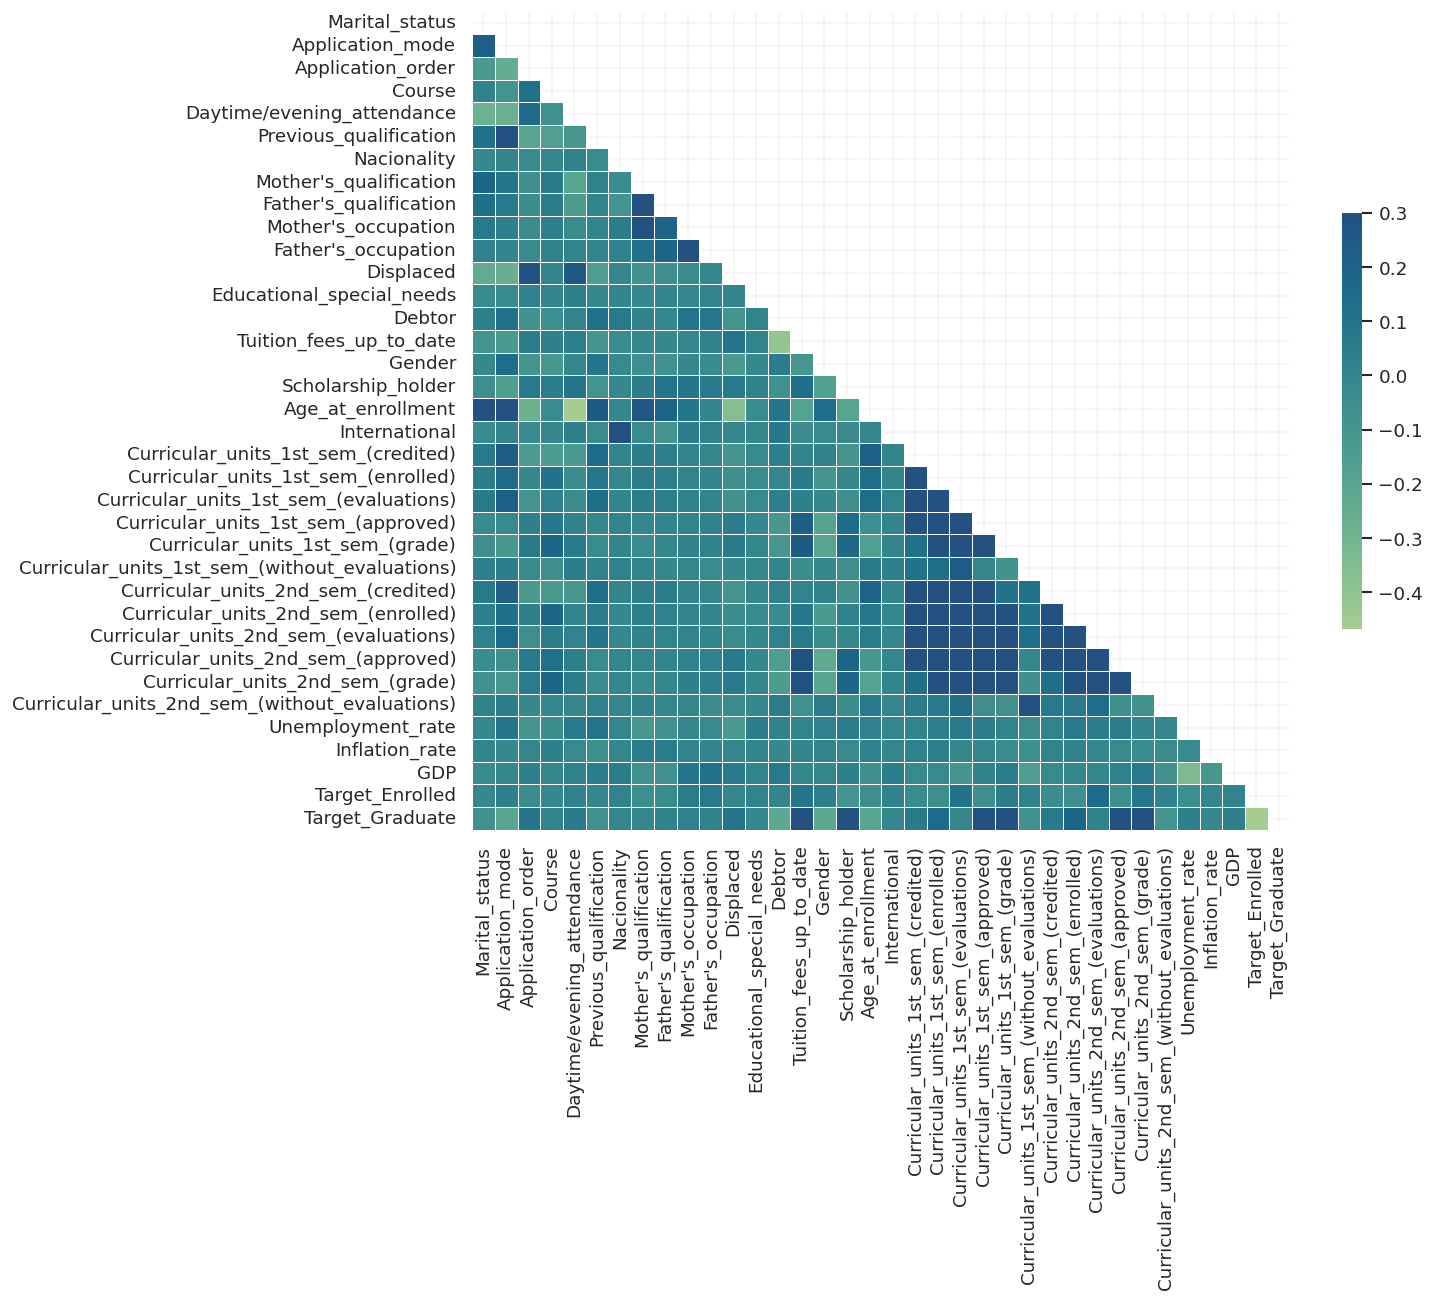

In [23]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.color_palette("crest", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

I want make one model, Target_Graduate has bigger correlations with data than Target_Enrolled, so I choose Target_Graduate

In [24]:
del df_dummies['Target_Enrolled']

In [25]:
df_dummies.corr()['Target_Graduate'].sort_values(ascending=False)

,Target_Graduate
Target_Graduate,1.000000
Curricular_units_2nd_sem_(approved),0.576840
Curricular_units_1st_sem_(approved),0.492443
Curricular_units_2nd_sem_(grade),0.472864
Curricular_units_1st_sem_(grade),0.412982
Tuition_fees_up_to_date,0.327197
Scholarship_holder,0.299484
Curricular_units_2nd_sem_(enrolled),0.180197
Curricular_units_1st_sem_(enrolled),0.160661
Displaced,0.102329


The biggest correlation with Target_Graduate have Curricular_units..(approved/ grade) and Tution_fees_up_to_date.

<Axes: >

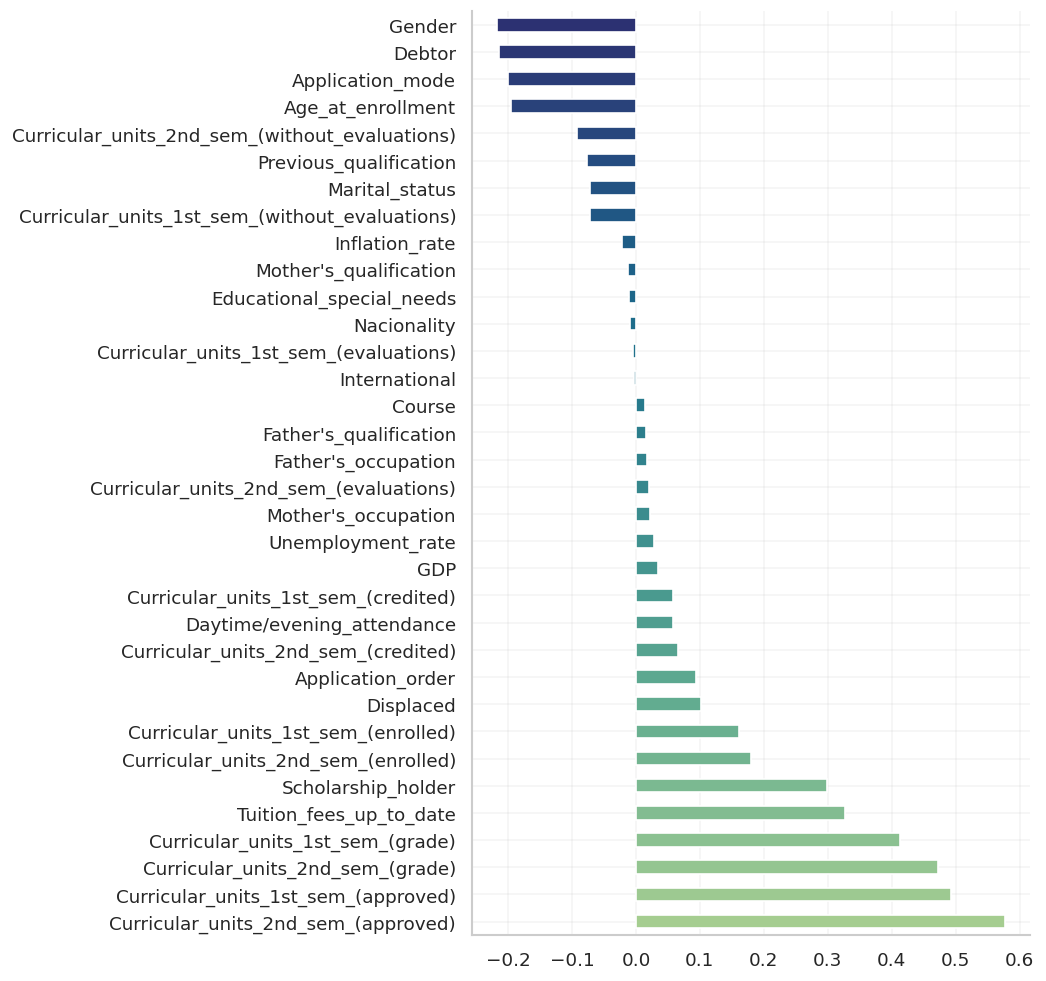

In [37]:
corr = df_dummies.corr()['Target_Graduate'].sort_values(ascending=False)
cmap = sns.color_palette("crest", as_cmap=True)
colors = [cmap(i) for i in np.linspace(0, 1, len(corr[1:]))]
corr[1:].plot(kind='barh', figsize=(6, 10), color=colors)

# *Linear regression*

In [38]:
data = df_dummies.copy()
target = data.pop('Target_Graduate')

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3318, 34)
(1106, 34)
(3318,)
(1106,)


In [41]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
regressor.score(X_test, y_test)

0.50939135658853

In [44]:
y_pred = regressor.predict(X_test)
y_true = y_test.copy()

In [46]:
predictions = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
1255,0,-0.107766,0.107766
3458,1,0.704329,0.295671
3390,1,0.923433,0.076567
1497,1,0.539208,0.460792
1536,0,-0.338547,0.338547


In [47]:
predictions.error.sort_values()

,error
2117,-1.015010
643,-1.004034
4244,-0.970587
1106,-0.963658
2941,-0.942784
...,...
3968,0.769942
2101,0.774714
2387,0.783123
1551,0.807257


<Axes: title={'center': 'error frequency'}, ylabel='Frequency'>

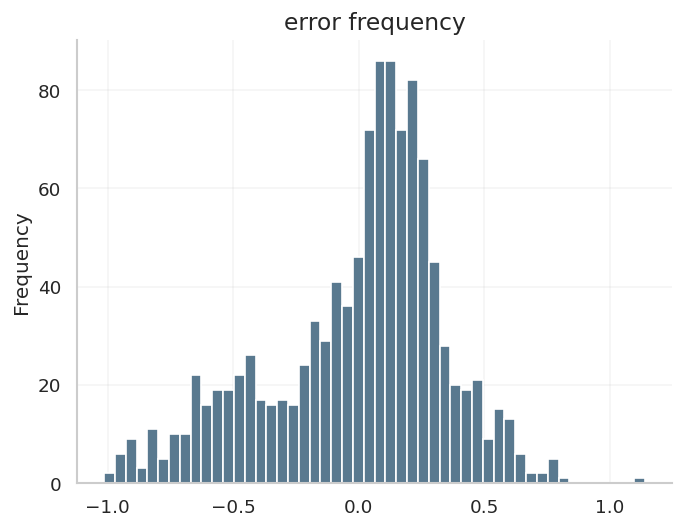

In [50]:
predictions.error.plot(kind='hist', bins=50, color = set_forest_spring_theme(), title='error frequency')

In [51]:
regressor.intercept_

np.float64(0.3615057894672119)

In [52]:
regressor.coef_

array([ 0.0123494 , -0.00288186, -0.00247186, -0.0068542 , -0.01604116,
        0.00610514, -0.00206826,  0.00091067,  0.00082078,  0.00190263,
       -0.00289669, -0.01060163, -0.05812183, -0.08350673,  0.12452855,
       -0.0234931 ,  0.10230227, -0.00092833,  0.06818211, -0.03601844,
        0.0190665 , -0.00770372,  0.05628383, -0.00359955,  0.01326525,
       -0.02995524, -0.06488106, -0.01956613,  0.11512309, -0.00820394,
        0.02137324, -0.00013165,  0.00163217,  0.00421998])

# *Bckward elimination*

In [53]:
import statsmodels.api as sm

X_train_ols = X_train.copy()
X_train_ols = X_train_ols.values
X_train_ols = sm.add_constant(X_train_ols)
X_train_ols

ols = sm.OLS(y_train, X_train_ols).fit()
predictors = ['const'] + list(X_train.columns)
ols.summary(xname=predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Target_Graduate   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     106.9
Date:                Mon, 01 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:14:40   Log-Likelihood:                -1171.9
No. Observations:                3318   AIC:                             2414.
Df Residuals:                    3283   BIC:                             2628.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3615      0.061      5.936      0.000       0.242       0.481
Marital_status                                     0.0123      0.012      0.997      0.319      -0.012       0.037
Application_mode                                  -0.0029      0.001     -2.017      0.044      -0.006   -7.98e-05
Application_order                                 -0.0025      0.005     -0.490      0.624      -0.012       0.007
Course                                            -0.0069      0.002     -4.398      0.000      -0.010      -0.004
Daytime/evening_attendance                        -0.0160      0.022     -0.716      0.474      -0.060       0.028
Previous_qualification                             0.0061      0.002      3.465      0.001       0.003       0.010
Nacionality                                       -0.0021      0.009     -0.243      0.808      -0.019       0.015
Mother's_qualification                             0.0009      0.001      1.067      0.286      -0.001       0.003
Father's_qualification                             0.0008      0.001      1.240      0.215      -0.000       0.002
Mother's_occupation                                0.0019      0.002      0.824      0.410      -0.003       0.006
Father's_occupation                               -0.0029      0.002     -1.603      0.109      -0.006       0.001
Displaced                                         -0.0106      0.014     -0.770      0.441      -0.038       0.016
Educational_special_needs                         -0.0581      0.058     -1.010      0.312      -0.171       0.055
Debtor                                            -0.0835      0.021     -3.886      0.000      -0.126      -0.041
Tuition_fees_up_to_date                            0.1245      0.022      5.766      0.000       0.082       0.167
Gender                                            -0.0235      0.013     -1.748      0.081      -0.050       0.003
Scholarship_holder                                 0.1023      0.015      6.759      0.000       0.073       0.132
Age_at_enrollment                                 -0.0009      0.001     -0.769      0.442      -0.003       0.001
International                                      0.0682      0.096      0.709      0.478      -0.120       0.257
Curricular_units_1st_sem_(credited)               -0.0360      0.010     -3.455      0.001      -0.056      -0.016
Curricular_units_1st_sem_(enrolled)                0.0191      0.012      1.605      0.109      -0.004       0.042
Curricular_units_1st_sem_(evaluations)            -0.0077      0.003     -2.636      0.008      -0.013      -0.002
Curricular_units_1st_sem_(approved)                0.0563      0.007      8.036      0.000   

In [54]:
import statsmodels.api as sm

SL = 0.05

Xdf = X_train.copy()
Xdf = sm.add_constant(Xdf, has_constant='add')
current = list(Xdf.columns)

while True:
    model = sm.OLS(y_train, Xdf).fit()

    p = model.pvalues.drop(labels=['const'], errors='ignore')
    worst_p = p.max()
    if worst_p <= SL:
        break
    worst_feat = p.idxmax()
    Xdf = Xdf.drop(columns=[worst_feat])
    current.remove(worst_feat)

print(model.summary(xname=current))

                            OLS Regression Results                            
Dep. Variable:        Target_Graduate   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     225.6
Date:                Mon, 01 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:16:15   Log-Likelihood:                -1182.3
No. Observations:                3318   AIC:                             2399.
Df Residuals:                    3301   BIC:                             2502.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------